In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)




# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

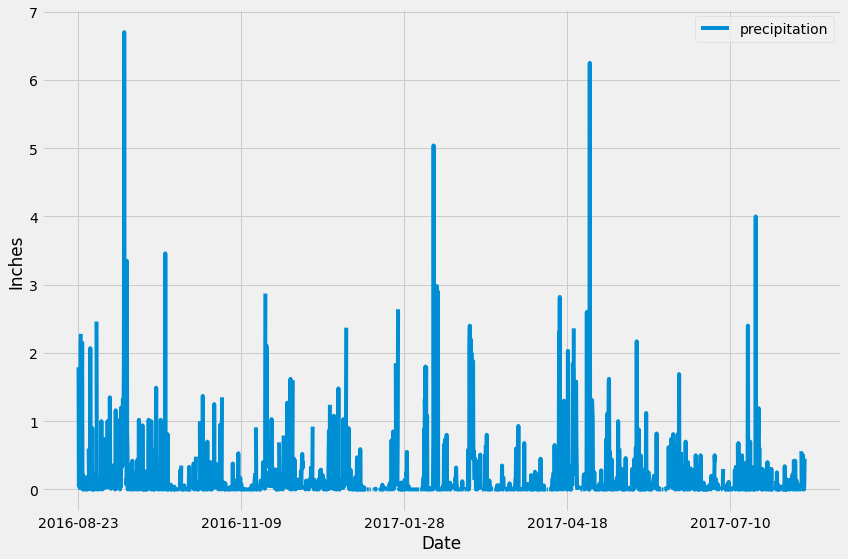

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
lp_date_obj = dt.datetime.strptime(most_recent_date[0],'%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = lp_date_obj - dt.timedelta(days=366)
one_year_ago

# Perform a query to retrieve the data and precipitation scores
last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measurements_df = pd.DataFrame(last_year_data, columns = ('date', 'precipitation'))

# Sort the dataframe by date
measurements_df.set_index('date',inplace=True)
measurements_df

measurements_df = measurements_df.sort_values(by='date', ascending=True)
measurements_df
# Use Pandas Plotting with Matplotlib to plot the data
ax = measurements_df.plot(figsize=(12,8))
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
plt.tight_layout()
plt.show()



In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurements_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).first()[0]
most_active_station

'USC00519281'

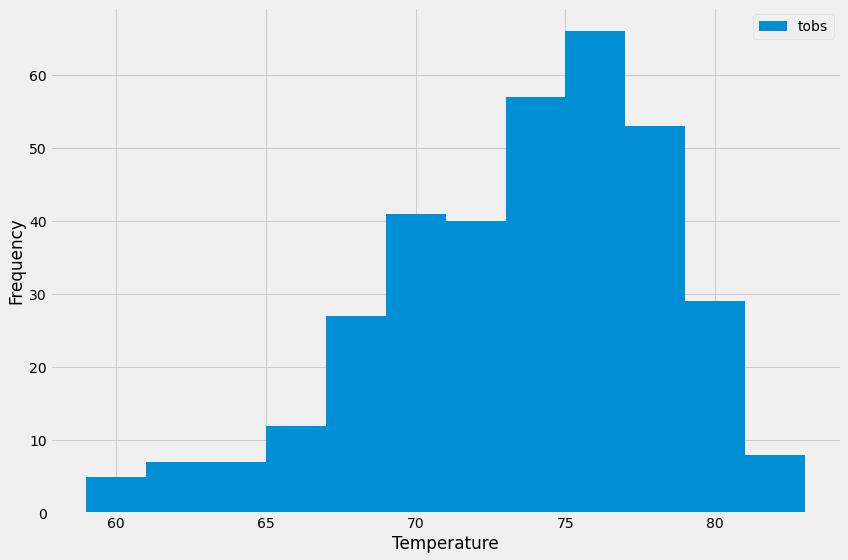

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram

most_active_lastyear_temp = session.query(Measurement.tobs).filter((Measurement.station==most_active_station),\
                                                                   (Measurement.date>=one_year_ago)).all()
temp_list = [temp[0] for temp in most_active_lastyear_temp]
temp_list
#plot the results as a histogram
plt.figure(figsize=(12,8))
plt.hist(temp_list, bins=12)
plt.legend(('tobs',),loc='best')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()







# Close session

In [25]:
# Close Session
session.close()